# Import package & load dataset

In [ ]:
!pip install category_encoders

# import package
import pandas as pd
import numpy as np
from google.colab import drive
import math
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
# load dataset

drive.mount('/content/drive')
path = '/content/drive/MyDrive/DAC K34/Machine Learning/Mini project 2/mini-project2 .csv'

df = pd.read_csv(path)
data = df.copy()

Mounted at /content/drive


# Data Cleaning

## Data overview

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97748 entries, 0 to 97747
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           97748 non-null  int64  
 1   Unnamed: 0             97748 non-null  int64  
 2   trans_date_trans_time  97748 non-null  object 
 3   cc_num                 97748 non-null  int64  
 4   merchant               97748 non-null  object 
 5   category               97748 non-null  object 
 6   amt                    97748 non-null  float64
 7   first                  97748 non-null  object 
 8   last                   97748 non-null  object 
 9   gender                 97748 non-null  object 
 10  street                 97748 non-null  object 
 11  city                   97748 non-null  object 
 12  state                  97748 non-null  object 
 13  zip                    97748 non-null  int64  
 14  lat                    97748 non-null  float64
 15  lo

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
1,2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2,2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
3,2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
4,2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


In [ ]:
data.shape

(97748, 24)

In [ ]:
# the first 2 columns are not relevant -> drop them
data = data.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97748 entries, 0 to 97747
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  97748 non-null  object 
 1   cc_num                 97748 non-null  int64  
 2   merchant               97748 non-null  object 
 3   category               97748 non-null  object 
 4   amt                    97748 non-null  float64
 5   first                  97748 non-null  object 
 6   last                   97748 non-null  object 
 7   gender                 97748 non-null  object 
 8   street                 97748 non-null  object 
 9   city                   97748 non-null  object 
 10  state                  97748 non-null  object 
 11  zip                    97748 non-null  int64  
 12  lat                    97748 non-null  float64
 13  long                   97748 non-null  float64
 14  city_pop               97748 non-null  int64  
 15  jo

## Duplicates + Missing values

In [ ]:
# check unique values
## print the percentage of unique
num_unique = data.nunique().sort_values()
print('---Percentage of unique values (%)---')
print(100/num_unique)

---Percentage of unique values (%)---
gender                   50.000000
is_fraud                 50.000000
category                  7.142857
state                     1.960784
first                     0.284091
last                      0.207900
job                       0.202429
merchant                  0.144300
city_pop                  0.113766
city                      0.111857
dob                       0.103306
lat                       0.103306
long                      0.103199
zip                       0.103093
cc_num                    0.101729
street                    0.101729
amt                       0.003992
merch_lat                 0.001026
trans_date_trans_time     0.001024
unix_time                 0.001024
merch_long                0.001024
trans_num                 0.001023
dtype: float64


In [ ]:
missing_rows_percentage = data.isnull().any(axis=1).mean() * 100
print(missing_rows_percentage)

0.0


In [ ]:
duplicate_count = data.duplicated().sum()
print(duplicate_count)

0


# Feature Engineering

### Transform as Hour of transaction

In [ ]:
data['tns_hour'] = data['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d %H:%M:%S').hour)

In [ ]:
data[['trans_date_trans_time','tns_hour']].head()

,trans_date_trans_time,tns_hour
0,2019-01-02 01:06:37,1
1,2019-01-02 01:47:29,1
2,2019-01-02 03:05:23,3
3,2019-01-02 03:38:03,3
4,2019-01-02 03:55:47,3


### Age of Users

In [ ]:
data['age'] = (2025 - data['dob'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d').year))

In [ ]:
data[['dob','age']].head()

,dob,age
0,1988-09-15,37
1,1960-10-28,65
2,1960-10-28,65
3,1988-09-15,37
4,1960-10-28,65


## Distance from user to merchant

In [ ]:
def harversine(lat1, lon1, lat2, lon2):
  R = 6371  #Earth's radius in km
  lat1, lon1, lat2, lon2 = map(math.radians,[lat1, lon1, lat2, lon2])

  dlat = lat2 - lat1
  dlon = lon2 - lon1
  a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2)*math.sin(dlon/2)**2
  c = 2 * math.sin(math.sqrt(a))

  return R * c #Distance in km

data['distance'] = data.apply(lambda x: harversine(x['lat'],x['long'],x['merch_lat'],x['merch_long']),axis=1)

## Remove some unused features

In [ ]:
exclude_cols = ['trans_date_trans_time', 'cc_num','first','last','dob','trans_num','unix_time',
               'long','lat','merch_lat','merch_long']
data.drop(columns = exclude_cols, inplace=True)

In [ ]:
data.head()

,merchant,category,amt,gender,street,city,state,zip,city_pop,job,is_fraud,tns_hour,age,distance
0,fraud_Rutherford-Mertz,grocery_pos,281.06,M,542 Steve Curve Suite 011,Collettsville,NC,28611,885,Soil scientist,1,1,37,68.952769
1,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,1595797,Horticultural consultant,1,1,65,78.405107
2,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,1595797,Horticultural consultant,1,3,65,41.012050
3,fraud_Erdman-Kertzmann,gas_transport,7.03,M,542 Steve Curve Suite 011,Collettsville,NC,28611,885,Soil scientist,1,3,37,34.145712
4,fraud_Koepp-Parker,grocery_pos,275.73,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,1595797,Horticultural consultant,1,3,65,44.209264


## Encoding

In [ ]:
# in ra danh sách các cột và số lượng những giá trị có data type là string
category_cols = data.select_dtypes(include = ['object'])
for col in category_cols:
  print(f"{col}:{data[col].nunique()}")

merchant:693
category:14
gender:2
street:983
city:894
state:51
job:494


**Trong trường hợp này thì chúng ta không nên đưa những trường thông tin có nhiều unique value vào trong model. Vì như vậy sẽ mất nhiều thời gian để model học đặc biệt là với thông tin từ 'street', 'city' vì chúng ta đã tính toán khoảng cách từ merchant theo.
Cột 'job' có thể đưa vào để model học vì như vậy sẽ giúp thu được kết quả chính xác hơn. Tuy nhiên khi đưa vào thì chúng ta nên tách job thành 1 bảng riêng, nối với bảng chính qua 'id_merchant'. Chúng ta có thể xây dựng 1 model phụ cho bảng 'job' để nhóm các nghề nghiệp theo nhóm (category). Model chính có thể học theo 'job_category' đó.**

In [ ]:
# encode các cột category, gender, state
list_columns = ['category','gender','state']
df_encoded = pd.get_dummies(data, columns = list_columns, drop_first=True)

# encoder = ce.OneHotEncoder(cols = list_columns, use_cat_names=True)

# df_encoded = encoder.fit_transform(data)

In [ ]:
df_encoded.head()

,merchant,amt,street,city,zip,city_pop,job,is_fraud,tns_hour,age,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,fraud_Rutherford-Mertz,281.06,542 Steve Curve Suite 011,Collettsville,28611,885,Soil scientist,1,1,37,...,False,False,False,False,False,False,False,False,False,False
1,"fraud_Jenkins, Hauck and Friesen",11.52,27954 Hall Mill Suite 575,San Antonio,78208,1595797,Horticultural consultant,1,1,65,...,False,False,True,False,False,False,False,False,False,False
2,fraud_Goodwin-Nitzsche,276.31,27954 Hall Mill Suite 575,San Antonio,78208,1595797,Horticultural consultant,1,3,65,...,False,False,True,False,False,False,False,False,False,False
3,fraud_Erdman-Kertzmann,7.03,542 Steve Curve Suite 011,Collettsville,28611,885,Soil scientist,1,3,37,...,False,False,False,False,False,False,False,False,False,False
4,fraud_Koepp-Parker,275.73,27954 Hall Mill Suite 575,San Antonio,78208,1595797,Horticultural consultant,1,3,65,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# drop những cột không cần dùng
cols = ['merchant','street','city','job']
df_encoded.drop(columns=cols,inplace=True)

In [ ]:
df_encoded.head()

,amt,zip,city_pop,is_fraud,tns_hour,age,distance,category_food_dining,category_gas_transport,category_grocery_net,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,281.06,28611,885,1,1,37,68.952769,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,11.52,78208,1595797,1,1,65,78.405107,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,276.31,78208,1595797,1,3,65,41.012050,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,7.03,28611,885,1,3,37,34.145712,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,275.73,78208,1595797,1,3,65,44.209264,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97748 entries, 0 to 97747
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      97748 non-null  float64
 1   zip                      97748 non-null  int64  
 2   city_pop                 97748 non-null  int64  
 3   is_fraud                 97748 non-null  int64  
 4   tns_hour                 97748 non-null  int64  
 5   age                      97748 non-null  int64  
 6   distance                 97748 non-null  float64
 7   category_food_dining     97748 non-null  bool   
 8   category_gas_transport   97748 non-null  bool   
 9   category_grocery_net     97748 non-null  bool   
 10  category_grocery_pos     97748 non-null  bool   
 11  category_health_fitness  97748 non-null  bool   
 12  category_home            97748 non-null  bool   
 13  category_kids_pets       97748 non-null  bool   
 14  category_misc_net     

# Model training

## 1. Split set to train, validate, test

In [ ]:
# bỏ cột is_fraud
x = df_encoded.drop('is_fraud', axis = 1)
# tạo df y với cột tên là 'is_fraud'
y = df_encoded[['is_fraud']]

#chia dataset thành training và temp, với 30% thuộc về temp và 70% thuộc về train
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

#chia temp thành validate và test, với 30% thuộc về test và 70% thuộc về validate
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.3, random_state=42)

print(f'Number data of train set: {len(x_train)}')
print(f'Number data of validate set: {len(x_val)}')
print(f'Number data of test set: {len(x_test)}')

Number data of train set: 68423
Number data of validate set: 20527
Number data of test set: 8798


## 2. Normalization each set

Normalization is a data preprocessing step that rescales the features of a dataset to a standard range. This is often done to improve the performance of machine learning algorithms, as many algorithms are sensitive to the scale of input features.

In [ ]:
scaler = MinMaxScaler()

# fit() method tính giá trị min và max của mỗi feature trong tập train
x_train_scaled = scaler.fit_transform(x_train)

x_val_scaled = scaler.transform(x_val)

x_test_scaled = scaler.transform(x_test)

## 3. Apply model

### Logistic regression

In [ ]:
clf_logis = LogisticRegression(random_state = 42)
clf_logis.fit(x_train_scaled, y_train)

y_pred_val = clf_logis.predict(x_val_scaled)
y_pred_train = clf_logis.predict(x_train_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest

In [ ]:
clf_rand = RandomForestClassifier(max_depth=15, random_state=42, n_estimators=100)

clf_rand.fit(x_train_scaled, y_train)

y_ranf_pre_train = clf_rand.predict(x_train_scaled)
y_ranf_pre_val = clf_rand.predict(x_val_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### Model Evaluation

Logistic Regression

In [ ]:
# calculates the balanced accurracy on the training data. Compared the actual target values in training data with prediction
# on the training data.
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)

# calculates the balanced accurracy on the validation data. Compared the actual target values in validation data with prediction
# on the validation data.
balanced_accuracy_val = balanced_accuracy_score(y_val, y_pred_val)
print(balanced_accuracy_train, balanced_accuracy_val)

0.6901824669558851 0.6869353488052361


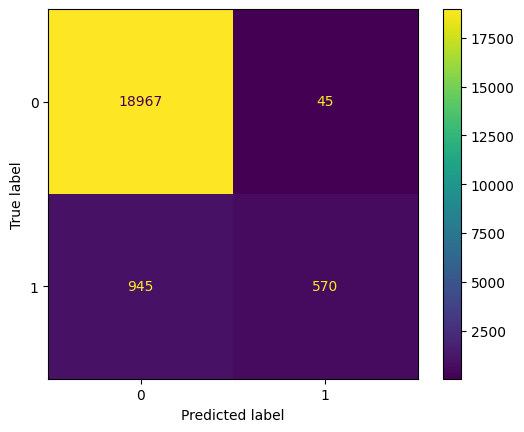

In [ ]:
cm = confusion_matrix(y_val, y_pred_val, labels=clf_logis.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_logis.classes_)
disp.plot()

Random Forest

In [ ]:
balanced_accuracy_train = balanced_accuracy_score(y_train,y_ranf_pre_train)
balanced_accuracy_val = balanced_accuracy_score(y_val, y_ranf_pre_val)
print(balanced_accuracy_train, balanced_accuracy_val)

0.9072701888789114 0.898089429708803


In [ ]:
# tạo ra 1 dictionary để test RandomForestClassifier
param_grid = {
    'n_estimators': [10,100,200],
    'max_depth' : [None, 15]
}

grid_search = GridSearchCV(clf_rand, param_grid, cv=5, scoring='balanced_accuracy')

grid_search.fit(x_train, y_train)

print('Best Parameters: ', grid_search.best_params_)

best_clf = grid_search.best_estimator_
accuracy = best_clf.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Best Parameters:  {'max_depth': None, 'n_estimators': 200}


In [ ]:
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

NameError: name 'y_true' is not defined